In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score

In [2]:
data=pd.read_csv('Heart_Disease_Prediction.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [3]:
df=data.rename(columns={'Heart Disease':'HeartDisease'})
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium HeartDisease  
0                        3         3     Presence  
1                        0         7      Absence  
2                        0      

In [4]:
df['HeartDisease'] = pd.to_numeric(df['HeartDisease'].map({'Presence':1,'Absence':0}))
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  HeartDisease             270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [6]:
class_distribution = df['HeartDisease'].value_counts()
class_distribution

HeartDisease
0    150
1    120
Name: count, dtype: int64

In [7]:
df.isnull().any().any()

False

In [8]:
Y=df.HeartDisease.values
X=df.drop(['HeartDisease'],axis=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scale_minmax=MinMaxScaler()
X=scale_minmax.fit_transform(X)
X

array([[0.85416667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.79166667, 0.        , 0.66666667, ..., 0.5       , 0.        ,
        1.        ],
       [0.58333333, 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5625    , 0.        , 0.33333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.58333333, 1.        , 1.        , ..., 0.5       , 0.        ,
        0.75      ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ]])

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)


(13, 216)
(216,)
(54,)


In [11]:
###Initialize the weights and bias
def initialize_W_b_with_zeros(num_features):
    w = np.zeros(shape = (num_features,1))
    b = 0
    return w,b

In [12]:
### Sigmoid Function
def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    
    return s

In [13]:
#Forward and Backward propagation function 
def propagate(w,b, X,Y):
    
    m = X.shape[1]
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    
    loss =  - (Y * np.log(A) + (1-Y) * np.log( 1-A) )
    cost=  np.sum(loss)/m
    
    dw = (1 / m) * np.dot(X, (A-Y).T)
    db = (1 / m) * np.sum(A-Y)
    
    gradient= {"dw": dw,
             "db": db}
    
    return gradient, cost

In [14]:
def update(w,b, X,Y, num_iterations, learning_rate):
    
    costs = []
    
    for i in range( num_iterations ):
        gradient, cost = propagate(w,b, X,Y)
        
        dw = gradient['dw']
        db = gradient['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 20 == 0:
            costs.append(cost)
            
    parameters = {"w": w,
                 "b": b}
    
    gradient= {"dw": dw,
             "db": db}
    
    return parameters, gradient, costs

In [15]:
def predict( w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid( np.dot(w.T , X) + b)
    
    for i in range(A.shape[1]):
        if A[:,i] > 0.5 :
              Y_prediction[:,i] = 1 
      
    return Y_prediction

In [32]:
def Logistic_Regression_model(X_train, X_test, Y_train, Y_test,num_iterations, learning_rate ):
    num_features = X_train.shape[0]
    w,b = initialize_W_b_with_zeros(num_features)
    parameters, gradient, costs = update(w,b, X_train,Y_train, num_iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_Test_Predict = predict(w,b, X_test)
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_Test_Predict - Y_test)) * 100))
    
    conf_matrix = confusion_matrix(Y_test.ravel(), Y_Test_Predict.ravel())
    classification_rep = classification_report(Y_test.ravel(), Y_Test_Predict.ravel())
    f1 = f1_score(Y_test.ravel(), Y_Test_Predict.ravel())
    recall = recall_score(Y_test.ravel(), Y_Test_Predict.ravel())

    print("Confusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", classification_rep)
    print("\nF1 Score:", f1)
    print("\nRecall:", recall)

    
    Dictionary = {"Prediction ": Y_Test_Predict,
                "Weight": w,
                "Bias" :b,
                "Cost Function" : costs}
    
    return Dictionary

In [33]:
Dictionary = Logistic_Regression_model(X_train, X_test, Y_train, Y_test, num_iterations=1000,learning_rate=0.10)

test accuracy: 90.74074074074073 %
Confusion Matrix:
 [[32  1]
 [ 4 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54


F1 Score: 0.8717948717948718

Recall: 0.8095238095238095


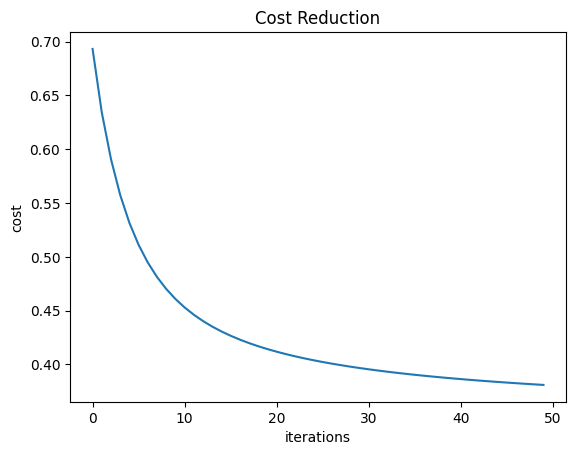

In [34]:
import matplotlib.pyplot as plt
costs=np.squeeze(Dictionary['Cost Function'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Cost Reduction")
plt.show()